# Levered 1

In [12]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from pandas_datareader import data as web


### Unlevered, Levered Daily, and Levered Monthly Performance

(                 SPY  Levered (Daily) SPY  Levered (Monthly) SPY
 Date                                                            
 1993-02-02  0.002119             0.006357                    NaN
 1993-02-03  0.010570             0.031710                    NaN
 1993-02-04  0.004185             0.012554                    NaN
 1993-02-05 -0.000694            -0.002083                    NaN
 1993-02-08  0.000000             0.000000                    NaN
 ...              ...                  ...                    ...
 2020-05-22  0.001899             0.005697                    NaN
 2020-05-26  0.012321             0.036962                    NaN
 2020-05-27  0.014879             0.044637                    NaN
 2020-05-28 -0.001845            -0.005535                    NaN
 2020-05-31       NaN                  NaN               0.128993
 
 [6978 rows x 3 columns],
                   SPY  Levered (Daily) SPY  Levered (Monthly) SPY
 Date                                          

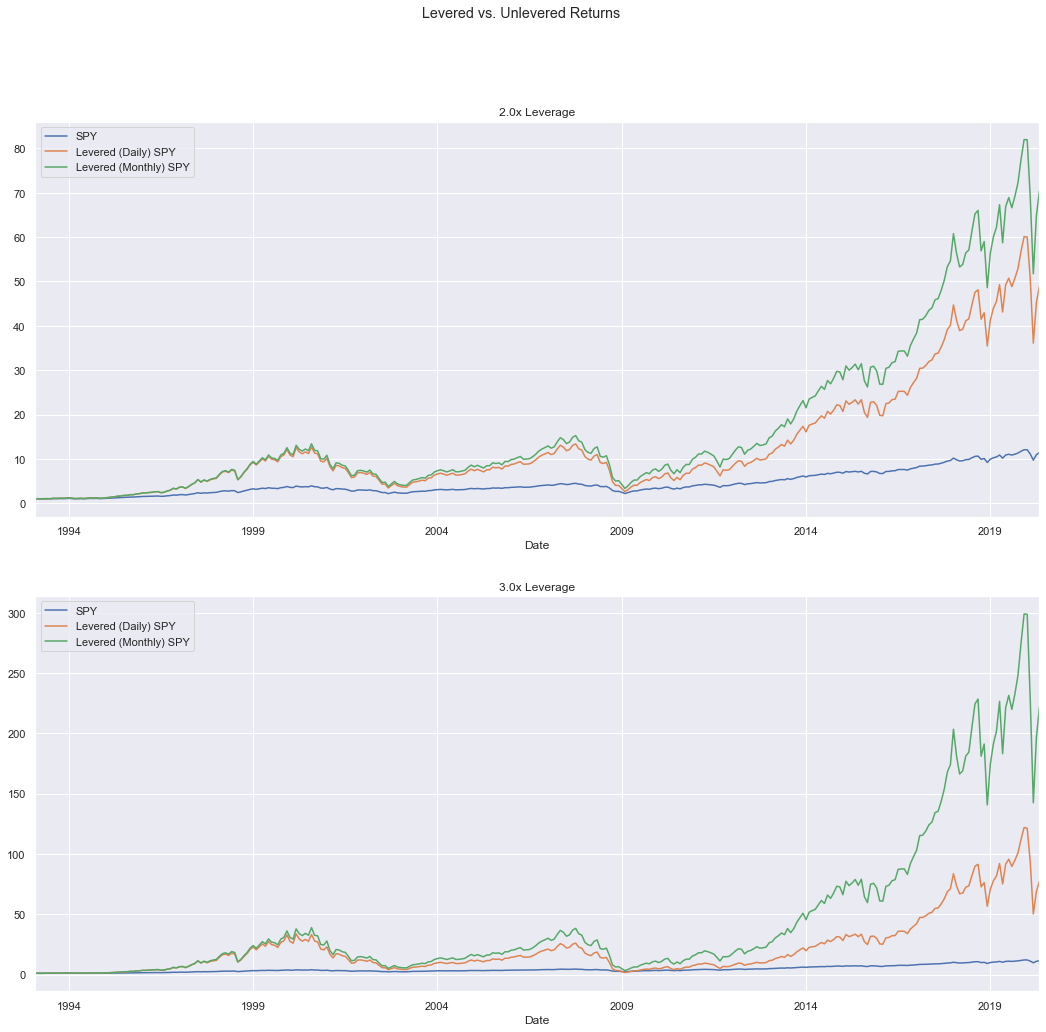

In [48]:
def full_period_leverage_plot(leverage_factor, ax=None, plot=True):
    start = '1993-01-31'
    end = '2020-05-28'
    
    spy = web.DataReader('SPY', "yahoo", start, end)['Adj Close'].pct_change().iloc[1:]
    daily_3x = spy * leverage_factor
    monthly_lev = spy.resample('M').apply(lambda x: (1.+x).cumprod().iloc[-1] - 1.) * leverage_factor 

    cum_spy = (1.+ spy).cumprod()
    cum_daily_lev = (1.+ daily_3x).cumprod()
    cum_monthly_lev = (1. + monthly_lev).cumprod()
    
    
    returns  = pd.DataFrame({'SPY': spy, 
                             'Levered (Daily) SPY': daily_3x, 
                             'Levered (Monthly) SPY': monthly_lev})
    cumulative = pd.DataFrame({'SPY': cum_spy, 
                               'Levered (Daily) SPY': cum_daily_lev, 
                               'Levered (Monthly) SPY': cum_monthly_lev}).resample('M').last()
    
    if plot:
        cumulative.plot(ax=ax, title=str(leverage_factor) + 'x ' + 'Leverage')
    return returns, cumulative

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 16))
fig.suptitle('Levered vs. Unlevered Returns')
full_period_leverage_plot(2., ax1)
full_period_leverage_plot(3., ax2)



## Different Entry Points, Resulting Geometric Return and Sharpe

In [ ]:
def geo_mean(iterable):
    a = np.array(iterable)
    return a.prod()**(1.0/len(a))